# Análisis de la satisfacción vital
**Dataset:** lifesat_full.csv  
**Objetivo:** Identificar las variables que influyen en la satisfacción vital mediante análisis exploratorio y regresión.


In [21]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv("ejemplo_housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
import toolbox_ML as tb

In [24]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
resumen = tb.describe_df(df)
resumen
    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
missing_pct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique_values,844,861,52,5911,1923,3879,1809,12825,3833,5
cardinality_pct,4.130573,4.213772,0.25449,28.928694,9.411247,18.983996,8.853326,62.766114,18.75887,0.02447


In [26]:
target_col='median_house_value'
col_numeric = tb.get_features_num_regression(df, target_col, corr_threshold=0.1)
col_numeric

['latitude', 'housing_median_age', 'total_rooms', 'median_income']

In [27]:

var_tipificadas = tb.tipifica_variables(df, umbral_categoria=10, umbral_continua=0.5
)
var_tipificadas    

,nombre_variable,tipo_sugerido
0,longitude,Numerica Continua
1,latitude,Numerica Continua
2,housing_median_age,Numerica Discreta
3,total_rooms,Numerica Continua
4,total_bedrooms,Numerica Continua
5,population,Numerica Continua
6,households,Numerica Continua
7,median_income,Numerica Continua
8,median_house_value,Numerica Continua
9,ocean_proximity,Categórica


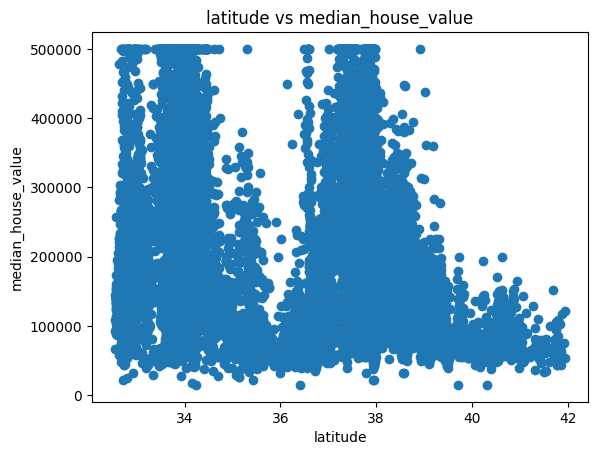

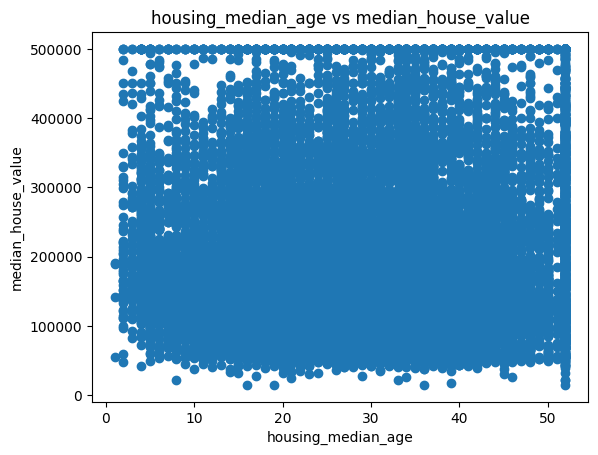

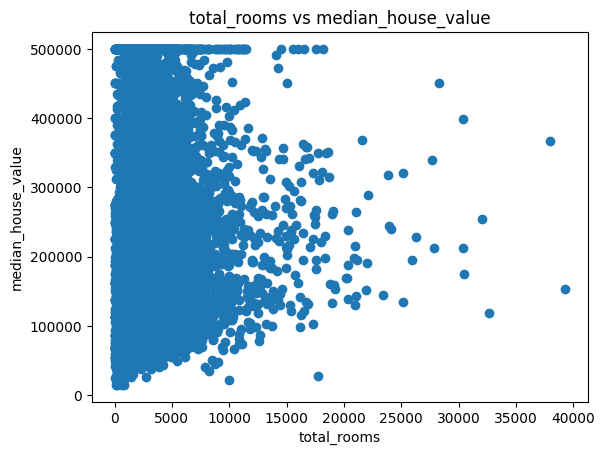

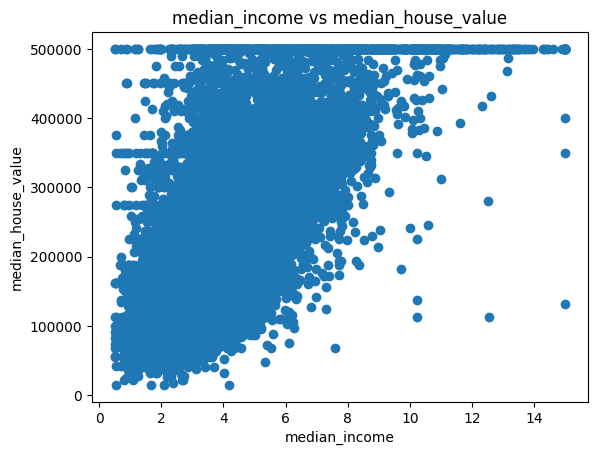

In [28]:
graficas=tb.plot_features_num_regression(df, col_numeric, target_col)
graficas

In [29]:
col_cat = tb.get_features_cat_regression(df, target_col, cardinality_threshold=0.1)
col_cat

['ocean_proximity']

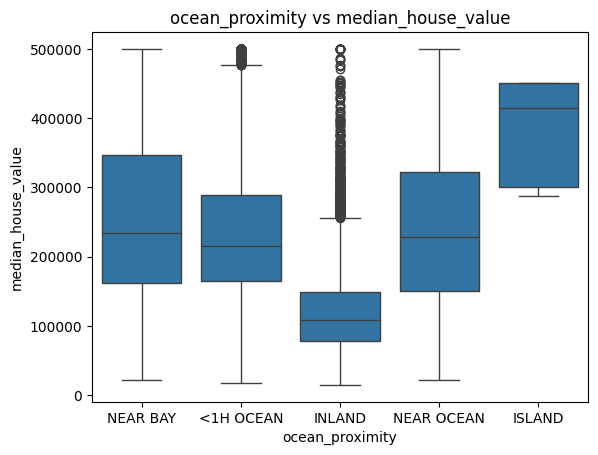

In [30]:
graficas_2=tb.plot_features_cat_regression(df, col_cat, target_col)